In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [4]:
df = pd.read_csv('german_credit_data.csv')

In [5]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df=df.drop('Unnamed: 0', axis=1)

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [11]:
df=pd.get_dummies(df, columns=['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'])

In [12]:
X=df[list(df)[1:9]]

In [13]:
df

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
1,22,2,5951,48,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,53,2,4870,24,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,35,3,6948,36,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
9,28,3,5234,30,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1743,24,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
993,30,3,3959,36,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
996,40,3,3857,30,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
998,23,2,1845,45,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [14]:
y=df['Risk_good']

In [15]:
#  Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

#  Instantiate object
ss = StandardScaler()

#  Train object on data
ss.fit(X)

#  Trandform data
X = ss.transform(X)

StandardScaler()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )
X_train.shape  
print()
X_test.shape   
print()

(365, 8)

(157, 8)

In [17]:
ct = dtree(
           criterion="gini",    
           max_depth=None       
                              
           )

In [18]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_te = ct.predict(X_test)

In [20]:
np.sum((y_test == y_te))/y_test.size 

0.535031847133758

<Figure size 1080x1080 with 0 Axes>

[Text(442.6442307692308, 733.86, 'node #0\nCredit amount <= 1.158\ngini = 0.494\nsamples = 365\nvalue = [162, 203]\nclass = Good'),
 Text(257.53846153846155, 570.78, 'node #1\nDuration <= -0.348\ngini = 0.478\nsamples = 321\nvalue = [127, 194]\nclass = Good'),
 Text(128.76923076923077, 407.70000000000005, 'node #2\nCredit amount <= -0.794\ngini = 0.4\nsamples = 152\nvalue = [42, 110]\nclass = Good'),
 Text(64.38461538461539, 244.62, 'node #3\nDuration <= -1.03\ngini = 0.499\nsamples = 40\nvalue = [19, 21]\nclass = Good'),
 Text(32.19230769230769, 81.54000000000008, '\n  (...)  \n'),
 Text(96.57692307692308, 81.54000000000008, '\n  (...)  \n'),
 Text(193.15384615384616, 244.62, 'node #32\nHousing_free <= 1.137\ngini = 0.326\nsamples = 112\nvalue = [23, 89]\nclass = Good'),
 Text(160.96153846153845, 81.54000000000008, '\n  (...)  \n'),
 Text(225.34615384615387, 81.54000000000008, '\n  (...)  \n'),
 Text(386.3076923076923, 407.70000000000005, 'node #95\nCredit amount <= -0.354\ngini = 0.5

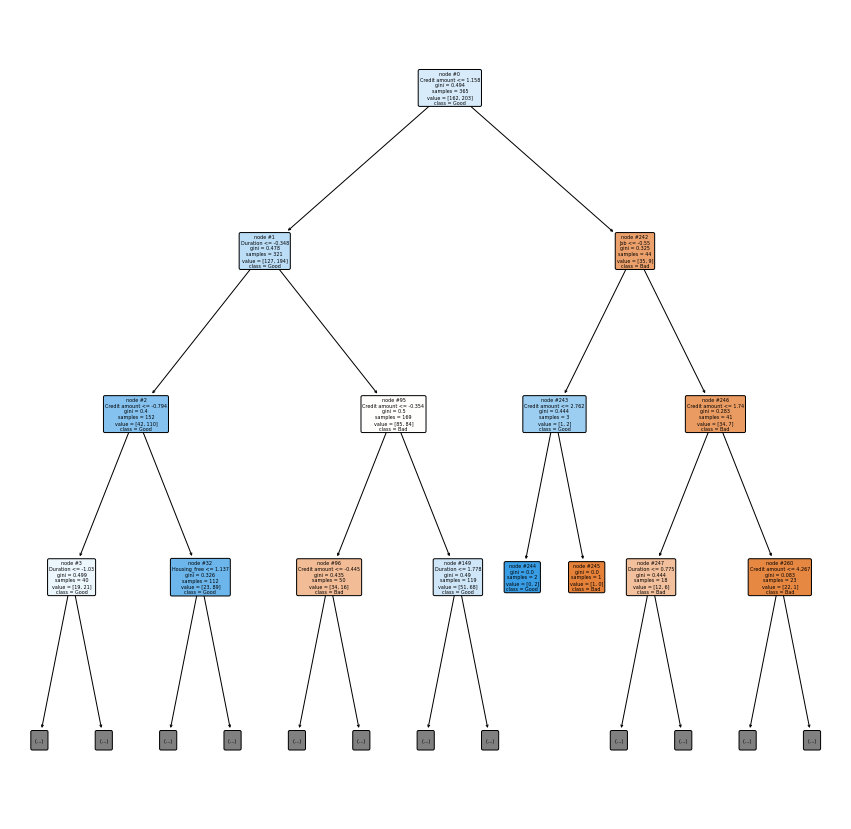

In [22]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

plt.show()

In [23]:
#Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    
           max_depth=None       
                              
           )

In [24]:
ct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(512.6625, 733.86, 'node #0\nDuration <= 1.778\nentropy = 0.991\nsamples = 365\nvalue = [162, 203]\nclass = Good'),
 Text(313.875, 570.78, 'node #1\nCredit amount <= 1.622\nentropy = 0.973\nsamples = 334\nvalue = [135, 199]\nclass = Good'),
 Text(167.4, 407.70000000000005, 'node #2\nDuration <= -0.348\nentropy = 0.957\nsamples = 317\nvalue = [120, 197]\nclass = Good'),
 Text(83.7, 244.62, 'node #3\nCredit amount <= -0.794\nentropy = 0.863\nsamples = 154\nvalue = [44, 110]\nclass = Good'),
 Text(41.85, 81.54000000000008, '\n  (...)  \n'),
 Text(125.55000000000001, 81.54000000000008, '\n  (...)  \n'),
 Text(251.10000000000002, 244.62, 'node #88\nCredit amount <= -0.354\nentropy = 0.997\nsamples = 163\nvalue = [76, 87]\nclass = Good'),
 Text(209.25, 81.54000000000008, '\n  (...)  \n'),
 Text(292.95, 81.54000000000008, '\n  (...)  \n'),
 Text(460.35, 407.70000000000005, 'node #237\nCredit amount <= 4.134\nentropy = 0.523\nsamples = 17\nvalue = [15, 2]\nclass = Bad'),
 Text(418.5, 244.

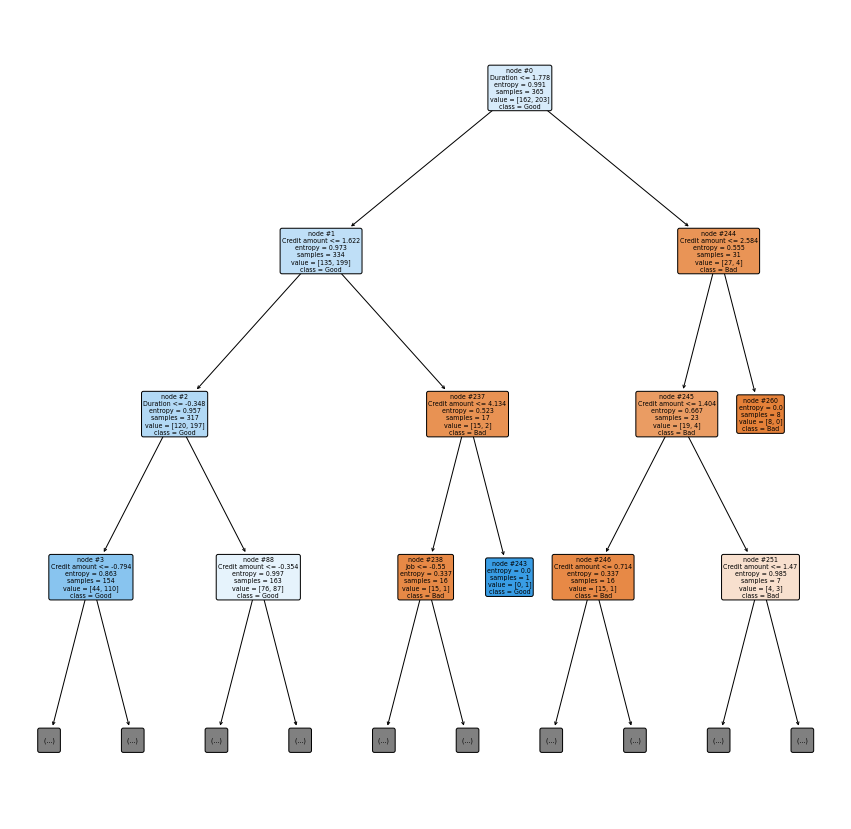

In [25]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

plt.show()

In [26]:
#Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )
ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
ct1.fit(X_train[2:,:],y_train[2:])

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(470.8125, 733.86, 'node #0\nCredit amount <= 2.584\nentropy = 0.992\nsamples = 363\nvalue = [162, 201]\nclass = Good'),
 Text(418.5, 570.78, 'node #1\nDuration <= 2.099\nentropy = 0.985\nsamples = 352\nvalue = [151, 201]\nclass = Good'),
 Text(209.25, 407.70000000000005, 'node #2\nHousing_own <= -0.358\nentropy = 0.973\nsamples = 330\nvalue = [133, 197]\nclass = Good'),
 Text(104.625, 244.62, 'node #3\nCredit amount <= 0.662\nentropy = 0.999\nsamples = 106\nvalue = [55, 51]\nclass = Bad'),
 Text(52.3125, 81.54000000000008, '\n  (...)  \n'),
 Text(156.9375, 81.54000000000008, '\n  (...)  \n'),
 Text(313.875, 244.62, 'node #90\nDuration <= -1.11\nentropy = 0.932\nsamples = 224\nvalue = [78, 146]\nclass = Good'),
 Text(261.5625, 81.54000000000008, '\n  (...)  \n'),
 Text(366.1875, 81.54000000000008, '\n  (...)  \n'),
 Text(627.75, 407.70000000000005, 'node #245\nHousing_own <= -0.358\nentropy = 0.684\nsamples = 22\nvalue = [18, 4]\nclass = Bad'),
 Text(523.125, 244.62, 'node #246\nJ

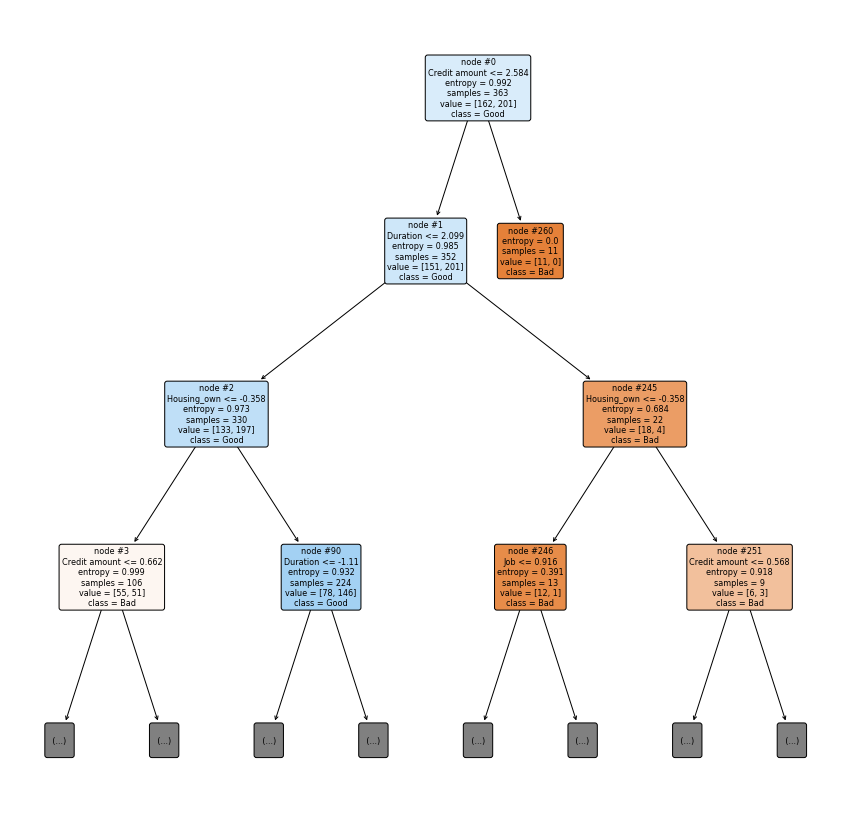

In [27]:
plt.figure(figsize=(15,15))
plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

plt.show()

In [28]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8789808917197452